In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
# from scipy.optimize import curve_fit
import os
import numpy as np
import glob

In [5]:
outpath_fig = './dataFolders/Output/Figures/v2/'
outpath = './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2/'

In [3]:
# Define exponential function func,  
# where a = alpha, b = Tau, c = y intercept

def fit_to_exponential(x, a, b, c):
     return a * np.exp(-(x / b)) + c

In [4]:
# parameters used

# which fitted parameters to pick from parameters df, those calculated from 1/2 (=0),1/4 (=1) or 1/8th (=2) of data 

idx = 1 # (because 1/4 length data slope is = 0 across all shapes)

10.081714285714286 1.3918616219384876 3.2039999999999997
7.385444444444445 0.6613250754777682 3.780666666666667
3.86130681818182 1.6626447688592203 6.281818181818181
1.9152499999999983 24.335877757914673 7.496


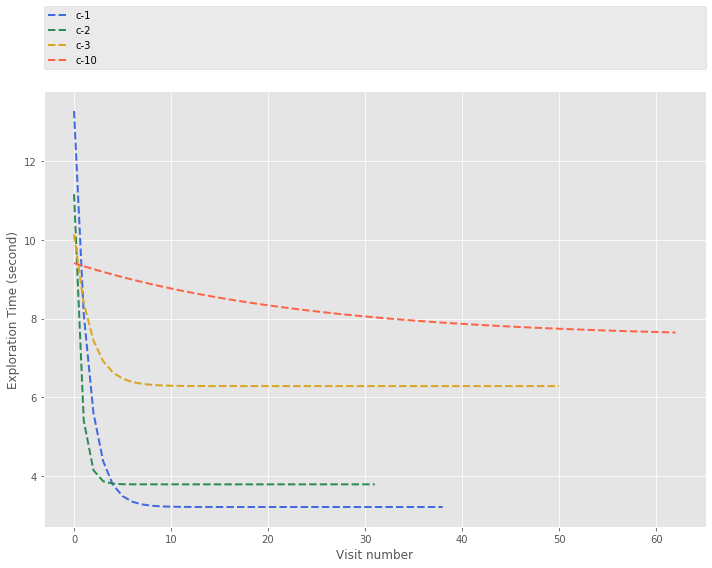

In [6]:
# do the fit for three different y0 - computed assuming the slope = 0 for 1/2 of the data
shapes = ['c-1', 'c-2','c-3', 'c-10']
colorLine = ['royalblue', 'seagreen', 'goldenrod', 'tomato']
# fig1, ax0 = plt.subplots(2, 2, sharex = True, sharey = True, figsize = (8,6))
fig1, ax = plt.subplots(figsize = (10,8))
# ax = ax0.ravel()
i = 0
for floralShape in shapes:
       
    file  = glob.glob(outpath + floralShape + '_Alltrials.csv')
    new_df = pd.read_csv(file[0])
    
    xdata = new_df.trialNum.values
    ydata = new_df.DiscoveryTime.values
    
    xdata_notnan = new_df[new_df.DiscoveryTime.notnull()].trialNum.values
    ydata_notnan = new_df[new_df.DiscoveryTime.notnull()].DiscoveryTime.values
    numMoth = len(new_df.name.unique())
    
    param_file = glob.glob(outpath + floralShape + '_FittedParameters.csv')
    param_df = pd.read_csv(param_file[0])
    
   
    a0 = param_df.loc[idx,'alpha']
    mean_y0 = param_df.loc[idx, 'y_intercept']
    tau = param_df.loc[idx, 'tau']
    
    # plot the final curve fit
    max_trial=max(xdata_notnan)
    ax.plot(range(0,max_trial), (fit_to_exponential(range(0,max_trial), a0, tau, mean_y0)), 
             '--', linewidth=2, color = colorLine[i], label = floralShape)   
#              label = 'fit: alpha= %5.3f , Tau= %5.3f, y0= %5.3f' %(a0/100, tau/100, mean_y0/100))

#     ax[i].set_title(floralShape, y=1.2)
    ax.set_xlabel('Visit number')
    ax.set_ylabel('Exploration Time (second)')
    leg = plt.legend()
    leg.get_frame().set_linewidth(1.5)
    ax.legend(bbox_to_anchor=(0., 1.05, 1., .102), loc=3, mode="expand", borderaxespad=0.)
#     ax.set_xlim([-5,90])
#     ax.set_ylim([-5,55])
#     ax.text(60, 40+i, floralShape + ' N= ' + str(numMoth))
    print(a0, tau, mean_y0)
    i+=1
    
fig1.tight_layout()
fig1.savefig(outpath_fig + 'All4LearningCurveTogether_withlargerYaxis.svg')